In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
landslides = pd.read_csv("/content/drive/MyDrive/CSVs/catalog.csv")

# set seed for reproducibility
np.random.seed(0)

In [2]:
print(landslides.head())

   id     date   time continent_code   country_name country_code  \
0  34   3/2/07  Night            NaN  United States           US   
1  42  3/22/07    NaN            NaN  United States           US   
2  56   4/6/07    NaN            NaN  United States           US   
3  59  4/14/07    NaN            NaN         Canada           CA   
4  61  4/15/07    NaN            NaN  United States           US   

  state/province  population         city/town  distance  ...  \
0       Virginia       16000       Cherry Hill   3.40765  ...   
1           Ohio       17288  New Philadelphia   3.33522  ...   
2   Pennsylvania       15930       Wilkinsburg   2.91977  ...   
3         Quebec       42786       Châteauguay   2.98682  ...   
4       Kentucky        6903         Pikeville   5.66542  ...   

                                 geolocation  hazard_type      landslide_type  \
0  (38.600900000000003, -77.268199999999993)    Landslide           Landslide   
1  (40.517499999999998, -81.4304999999

In [4]:
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [5]:
# check the data type of our date column
landslides['date'].dtype  

dtype('O')

In [6]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

In [7]:
# print the first few rows
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [8]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


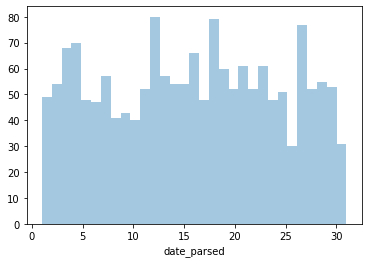

In [9]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)